In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [6]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [7]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,8166,15813503,Pickering,606,Spain,Male,37,8,154712.58,2,1,0,89099.18,0
4689,4690,15737832,Robertson,771,Spain,Male,45,0,139825.56,1,0,0,170984.97,1
5170,5171,15623695,McKinnon,814,France,Female,31,4,0.00,2,1,1,142029.17,0
4710,4711,15685653,Benson,585,Germany,Female,40,3,162261.01,2,1,0,137028.51,0
3143,3144,15722061,Allen,619,Germany,Female,41,8,142015.76,2,1,0,114323.66,0
6720,6721,15647207,Onwuemelie,609,France,Male,26,7,0.00,2,1,0,98463.99,0
3170,3171,15791373,Chikezie,850,Germany,Female,35,2,80931.75,1,0,0,12639.67,1
1848,1849,15685844,White,518,Germany,Female,35,8,141665.63,1,0,1,192776.64,0
4758,4759,15601263,Young,493,Spain,Female,48,7,0.00,2,1,0,48545.10,0
9527,9528,15682868,Elliott,850,France,Female,40,9,99816.46,1,1,1,163989.66,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.drop(columns=['RowNumber',	'CustomerId',	'Surname'	],inplace=True)

In [11]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: xlabel='Geography'>

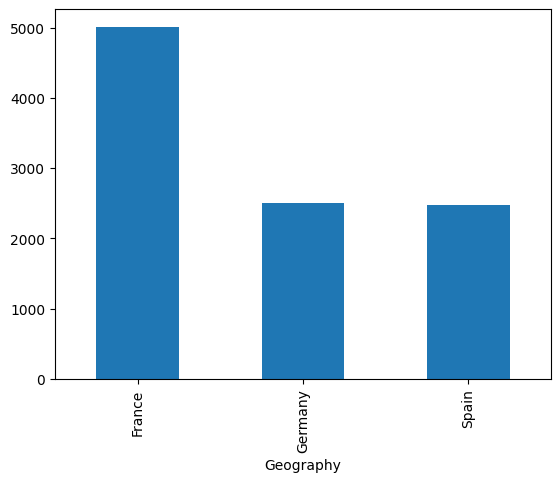

In [12]:
df['Geography'].value_counts().plot(kind='bar')

In [13]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: xlabel='Gender'>

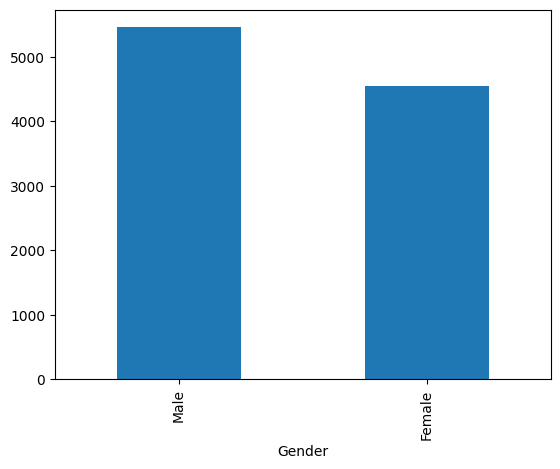

In [14]:
df['Gender'].value_counts().plot(kind='bar')

<Axes: ylabel='Density'>

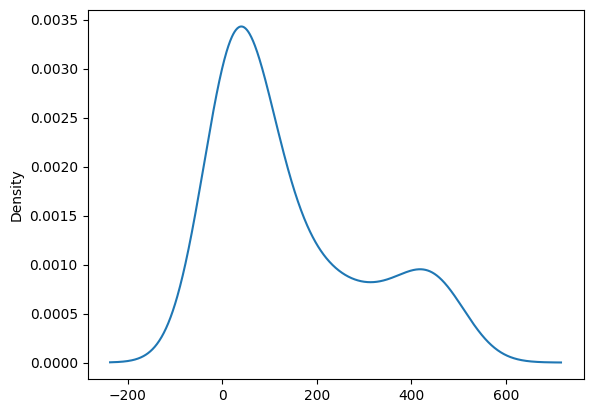

In [15]:
df['Age'].value_counts().plot(kind='kde')

In [16]:
df=pd.get_dummies(df,columns=['Gender','Geography'],drop_first=True)

In [17]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [18]:
X=df.drop(columns=['Exited'])
y=df['Exited'].values

In [19]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,True,False


In [20]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=.2)

In [23]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
8856,774,26,5,0.00,2,1,1,64716.08,False,False,False
1545,602,42,6,158414.85,1,1,1,131886.46,False,True,False
8136,716,38,1,0.00,2,1,1,99661.46,False,False,False
7768,601,20,9,122446.61,2,1,0,86791.90,False,False,True
7782,585,54,8,87105.32,1,1,1,55346.14,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1099,494,38,7,0.00,2,1,1,6203.66,True,False,True
2514,592,26,4,105082.07,2,1,0,132801.57,False,True,False
6637,850,36,3,0.00,2,1,0,195033.07,True,False,False
2575,551,54,5,102994.04,1,1,0,176680.16,True,True,False


In [24]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
7878,731,38,10,123711.73,2,1,0,171340.68,False,False,False
3224,645,41,2,138881.04,1,1,0,129936.53,False,True,False
1919,618,56,7,0.00,1,1,1,142400.27,True,False,False
4432,621,33,4,0.00,2,1,1,40299.23,True,False,True
4835,561,34,4,85141.79,2,1,1,29217.37,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9073,702,60,5,138597.54,2,1,1,41536.59,False,True,False
8584,731,19,6,0.00,2,1,1,151581.79,True,False,False
5390,735,38,1,0.00,3,0,0,92220.12,False,False,False
5092,688,39,0,0.00,2,1,0,53222.15,False,False,False


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()

In [27]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [28]:
h=pd.DataFrame(X_train_scaled)



In [29]:
h

,0,1,2,3,4,5,6,7,8,9,10
0,1.277546,-1.232643,-0.012743,-1.239615,0.811186,0.649203,0.965108,-0.620271,-1.086203,-0.584086,-0.571384
1,-0.499595,0.284106,0.332830,1.306219,-0.902437,0.649203,0.965108,0.546598,-1.086203,1.712076,-0.571384
2,0.678277,-0.095081,-1.395034,-1.239615,0.811186,0.649203,0.965108,-0.013208,-1.086203,-0.584086,-0.571384
3,-0.509927,-1.801425,1.369548,0.728185,0.811186,0.649203,-1.036153,-0.236775,-1.086203,-0.584086,1.750136
4,-0.675242,1.421668,1.023976,0.160226,-0.902437,0.649203,0.965108,-0.783044,0.920638,-0.584086,-0.571384
...,...,...,...,...,...,...,...,...,...,...,...
7995,-1.615474,-0.095081,0.678403,-1.239615,0.811186,0.649203,0.965108,-1.636736,0.920638,-0.584086,1.750136
7996,-0.602917,-1.232643,-0.358316,0.449125,0.811186,0.649203,-1.036153,0.562495,-1.086203,1.712076,-0.571384
7997,2.062794,-0.284675,-0.703889,-1.239615,0.811186,0.649203,-1.036153,1.643567,0.920638,-0.584086,-0.571384
7998,-1.026538,1.421668,-0.012743,0.415569,-0.902437,0.649203,-1.036153,1.324744,0.920638,1.712076,-0.571384


In [30]:
import tensorflow
from tensorflow import keras

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [34]:
model=Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
history=model.fit(X_train_scaled,y_train,batch_size=50,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8180 - loss: 0.4172 - val_accuracy: 0.8406 - val_loss: 0.3902
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8317 - loss: 0.4123 - val_accuracy: 0.8431 - val_loss: 0.3887
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8330 - loss: 0.4069 - val_accuracy: 0.8444 - val_loss: 0.3867
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8321 - loss: 0.4081 - val_accuracy: 0.8450 - val_loss: 0.3844
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8319 - loss: 0.4042 - val_accuracy: 0.8456 - val_loss: 0.3825
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8405 - loss: 0.3963 - val_accuracy: 0.8469 - val_loss: 0.3805
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8311 - loss: 0.4044 - val_accuracy: 0.8475 - val_loss: 0.3787
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8343 - loss: 0.3940 - val_accuracy: 0.

In [97]:
y_pred=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [98]:
y_pred

array([[0.16579285],
       [0.6391257 ],
       [0.33847216],
       ...,
       [0.18835846],
       [0.18761778],
       [0.2904301 ]], dtype=float32)

In [99]:
y_pred=y_pred.argmax(axis=-1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8085

In [74]:
history.history

{'accuracy': [0.8257812261581421,
  0.8290625214576721,
  0.828906238079071,
  0.8317187428474426,
  0.8332812786102295,
  0.8349999785423279,
  0.8359375,
  0.8374999761581421,
  0.8364062309265137,
  0.8374999761581421],
 'loss': [0.41236546635627747,
  0.410320520401001,
  0.4082275629043579,
  0.40610599517822266,
  0.40385472774505615,
  0.40171292424201965,
  0.3996220529079437,
  0.3972673714160919,
  0.3954799175262451,
  0.39337167143821716],
 'val_accuracy': [0.840624988079071,
  0.8431249856948853,
  0.8443750143051147,
  0.8450000286102295,
  0.8456249833106995,
  0.846875011920929,
  0.8475000262260437,
  0.846875011920929,
  0.8450000286102295,
  0.846875011920929],
 'val_loss': [0.3901638388633728,
  0.3887336254119873,
  0.3867262005805969,
  0.38436973094940186,
  0.3824564814567566,
  0.38052406907081604,
  0.37866878509521484,
  0.37824875116348267,
  0.3758428692817688,
  0.37458640336990356]}

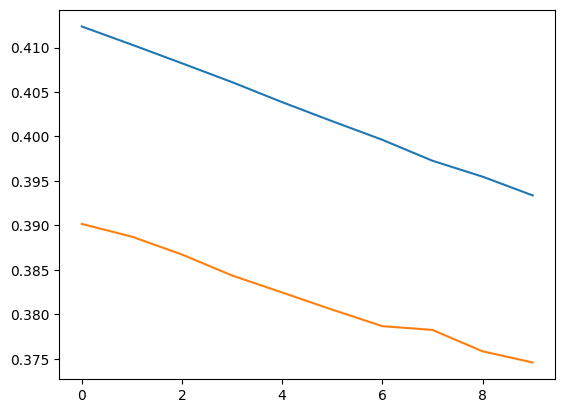

In [75]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

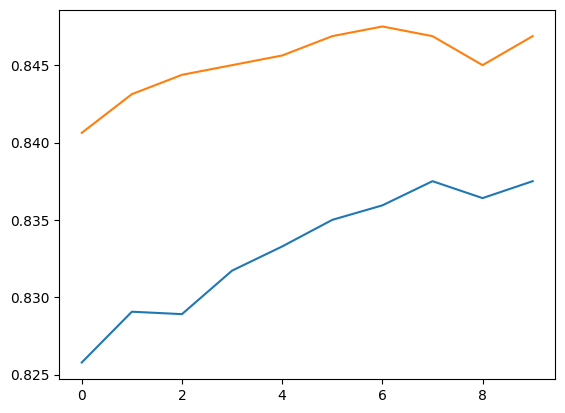

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

prediction

In [77]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
7878,731,38,10,123711.73,2,1,0,171340.68,False,False,False
3224,645,41,2,138881.04,1,1,0,129936.53,False,True,False
1919,618,56,7,0.00,1,1,1,142400.27,True,False,False
4432,621,33,4,0.00,2,1,1,40299.23,True,False,True
4835,561,34,4,85141.79,2,1,1,29217.37,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9073,702,60,5,138597.54,2,1,1,41536.59,False,True,False
8584,731,19,6,0.00,2,1,1,151581.79,True,False,False
5390,735,38,1,0.00,3,0,0,92220.12,False,False,False
5092,688,39,0,0.00,2,1,0,53222.15,False,False,False


In [81]:
X_test_scaled.shape

(2000, 11)

In [86]:
y_test[0]

1

In [82]:
X_test_scaled[0]

array([ 0.83326067, -0.09508124,  1.71512123,  0.74851603,  0.81118618,
        0.64920267, -1.03615311,  1.23198813, -1.0862028 , -0.58408625,
       -0.57138416])

In [102]:
h=model.predict(X_test_scaled[0].reshape(1,11))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [103]:
h.argmax()

0